## Task 2: Building a simple Linear Regression Model

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r"C:\Users\N.NAGESH\Desktop\CodVeda\Dataset\2) Stock Prices Data Set.csv")

In [3]:
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
data.shape

(497472, 7)

In [5]:
abc_data = data[data['symbol'] == "ABC"]

In [6]:
abc_data.head()

,symbol,date,open,high,low,close,volume
4,ABC,2014-01-02,70.11,70.230,69.48,69.89,1148391
487,ABC,2014-01-03,69.89,70.210,69.81,69.94,1101319
970,ABC,2014-01-06,70.34,70.540,69.35,69.69,1301393
1453,ABC,2014-01-07,69.82,70.920,69.82,70.45,1531604
1936,ABC,2014-01-08,70.33,71.412,70.28,71.14,2084010


In [7]:
abc_data.shape

(1007, 7)

In [8]:
abc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 4 to 496971
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1007 non-null   object 
 1   date    1007 non-null   object 
 2   open    1007 non-null   float64
 3   high    1007 non-null   float64
 4   low     1007 non-null   float64
 5   close   1007 non-null   float64
 6   volume  1007 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 62.9+ KB


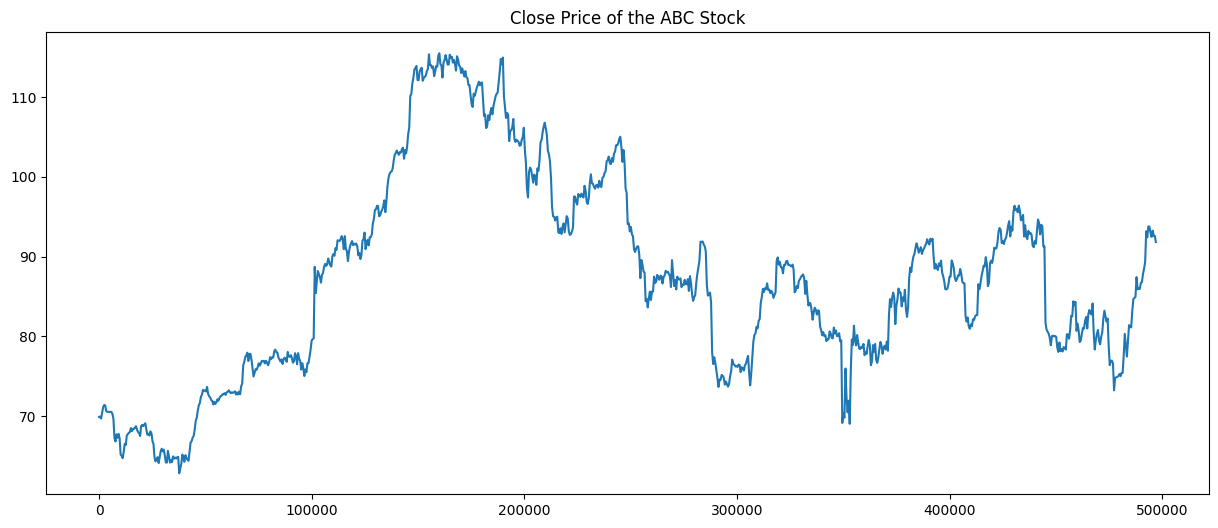

In [9]:
plt.figure(figsize=(15,6))
plt.plot(abc_data["close"])
plt.title("Close Price of the ABC Stock")
plt.show()

In [10]:
x = abc_data[["open","high","low","volume"]]
y = abc_data['close']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=False)

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
y_pred = pd.Series(y_pred)

In [18]:
y_pred.index = y_test.index

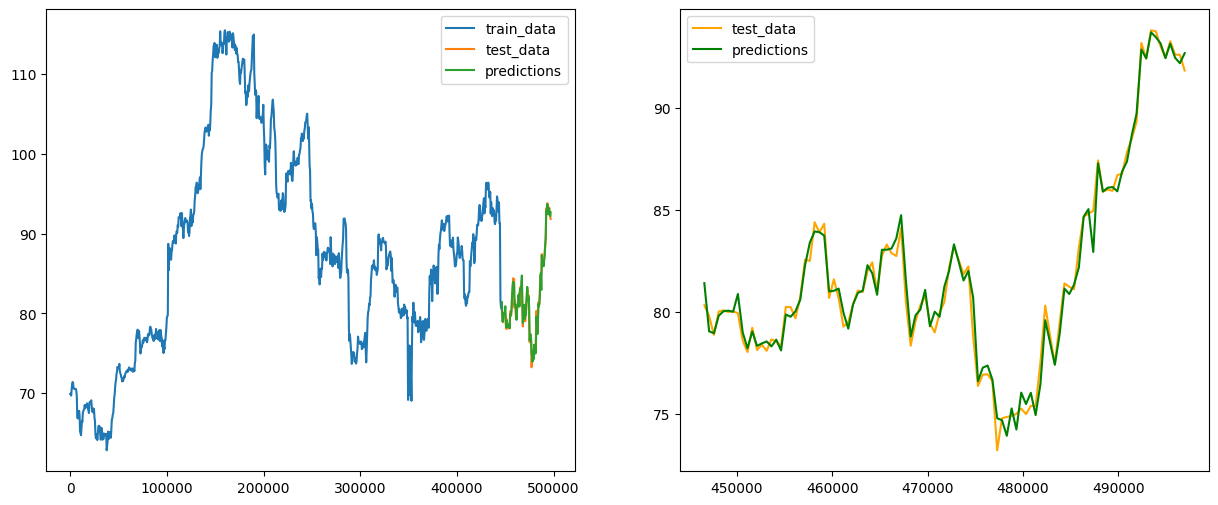

In [19]:
fig,axes = plt.subplots(1,2,figsize = (15,6))

axes[0].plot(y_train,label = "train_data")
axes[0].plot(y_test,label = "test_data")
axes[0].plot(y_pred,label = "predictions")
axes[0].legend()

axes[1].plot(y_test,label = "test_data",color = 'orange')
axes[1].plot(y_pred,label = "predictions",color = 'green')
axes[1].legend()
plt.show()

In [22]:
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.5511513201695558
